<center><h1>Homework Assignment #2</h1></center>
<table width="100%">
    <tr>
        <td><img src="../images/img0.jpg" /></td>
    </tr>
</table>

1. The following code uses dplyr to generate some summary statistics about each class of car. Use the data to recreate this plot:

```R
library("ggplot2")
library("dplyr")
class <- mpg %>% 
  group_by(class) %>% 
  summarise(n = n(), hwy = mean(hwy))
head(class)
```

<table width="60%" align="centre">
    <tr>
        <td><img src="../images/img100.png" /></td>
    </tr>
</table>

In [1]:
library("ggplot2", quietly = TRUE)
library("dplyr", quietly = TRUE)
class <- mpg %>% 
  group_by(class) %>% 
  summarise(n = n(), hwy = mean(hwy))
head(class)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




class,n,hwy
<chr>,<int>,<dbl>
2seater,5,24.80000
compact,47,28.29787
midsize,41,27.29268
minivan,11,22.36364
pickup,33,16.87879
subcompact,35,28.14286


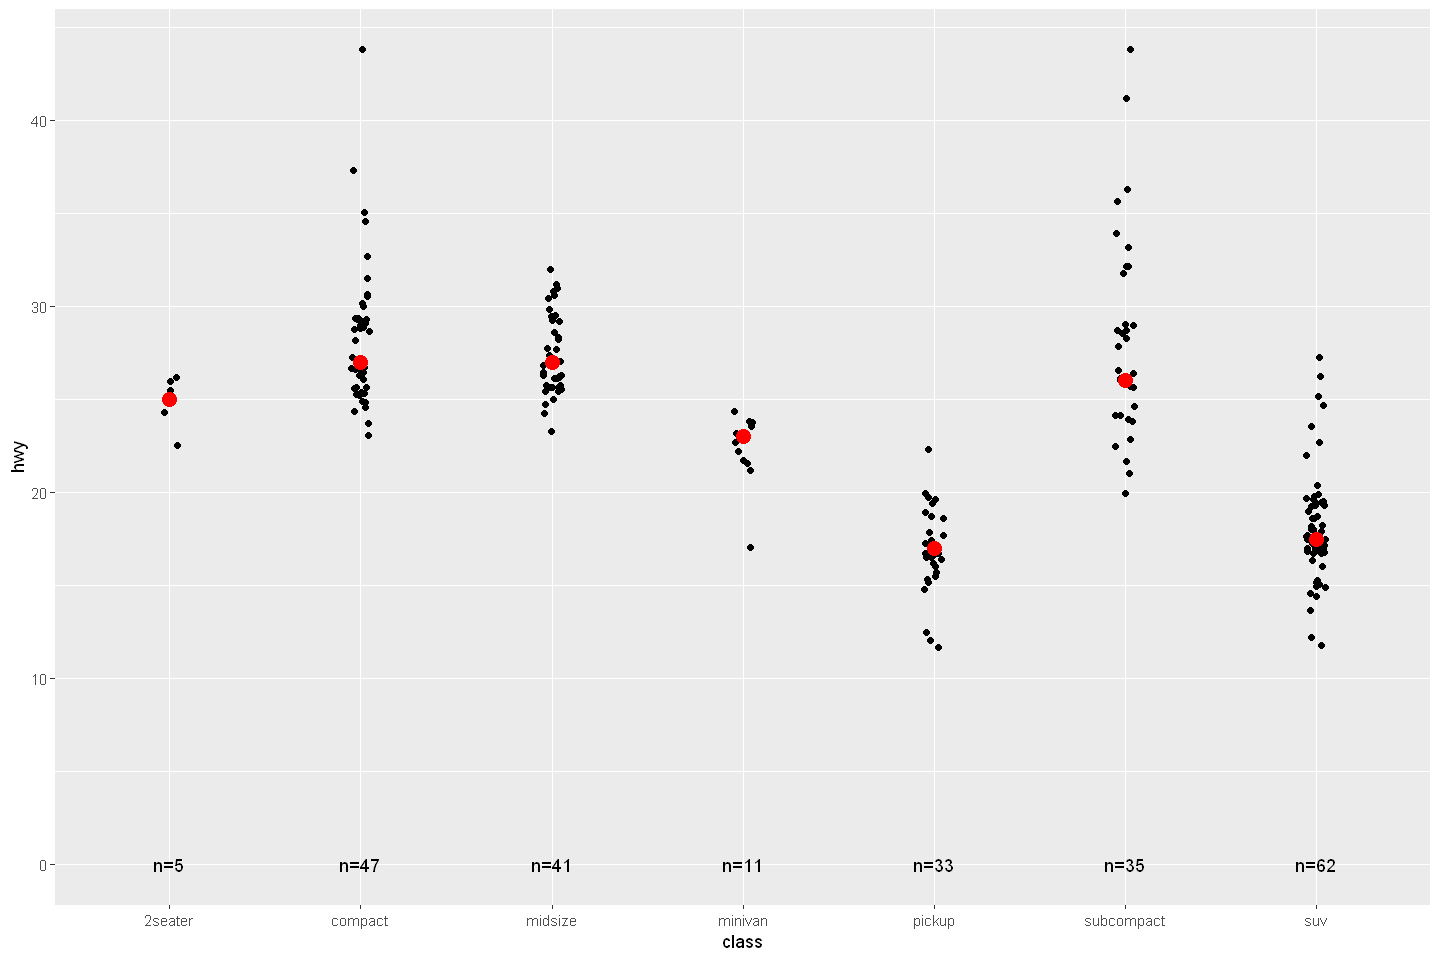

In [7]:
options(repr.plot.width=12, repr.plot.height=8)
ggplot(mpg, 
       aes(class, hwy)) +
  geom_jitter(width = 0.05, 
              height = 0.5) +
  stat_summary(geom = "point", 
               fun = "median", 
               colour = "red", 
               size = 4)+
  geom_text(data = class,aes(y = 0,label = paste("n",n ,sep = "=")))

2. What does the following code do? Does it work? Does it make sense? Why/why not?

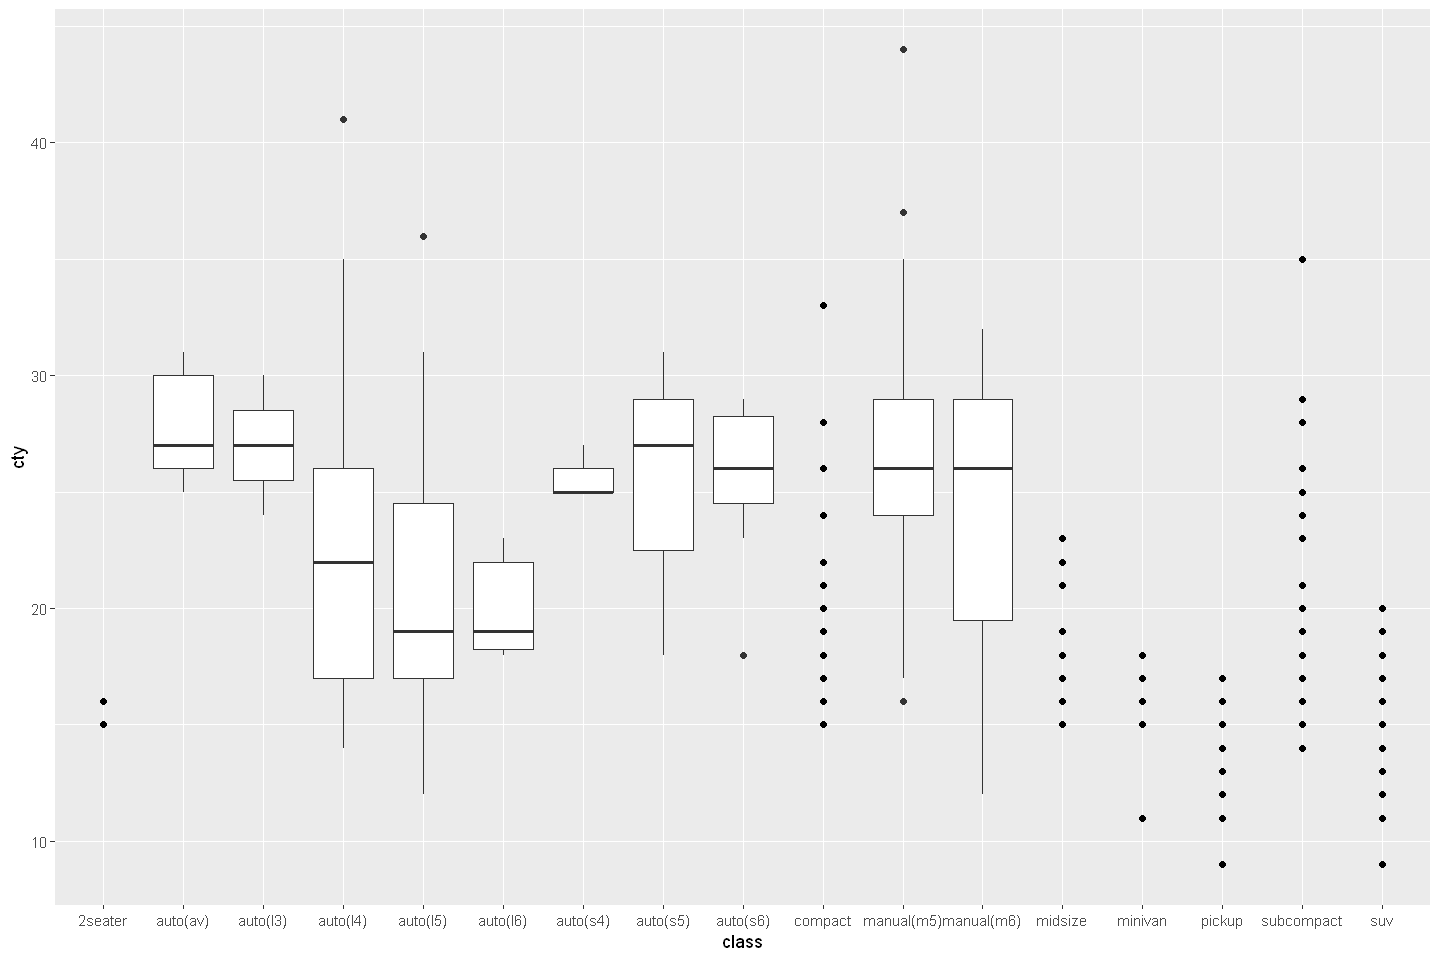

In [8]:
options(repr.plot.width=12, repr.plot.height=8)

ggplot(mpg) + 
geom_point(aes(class, cty)) + 
geom_boxplot(aes(trans, hwy))

The plot uses mpg dataset and creates scatter plot as a first layer and box plot as the second layer. 
Layer 1 uses class for x-axis and cty for y-axis.
Layer 2 uses trans for x-axis and hwy for y-axis

The plot doesn't make a whole lot of sense as the plot as both axis have been overlapped. The mix of the axis makes the plot difficult to read. Flipping the plot might have helped reading the box plots 
Further the plot doesn't show the aesthetics of box plots

3. What’s gone wrong with this plot? How could you fix it?

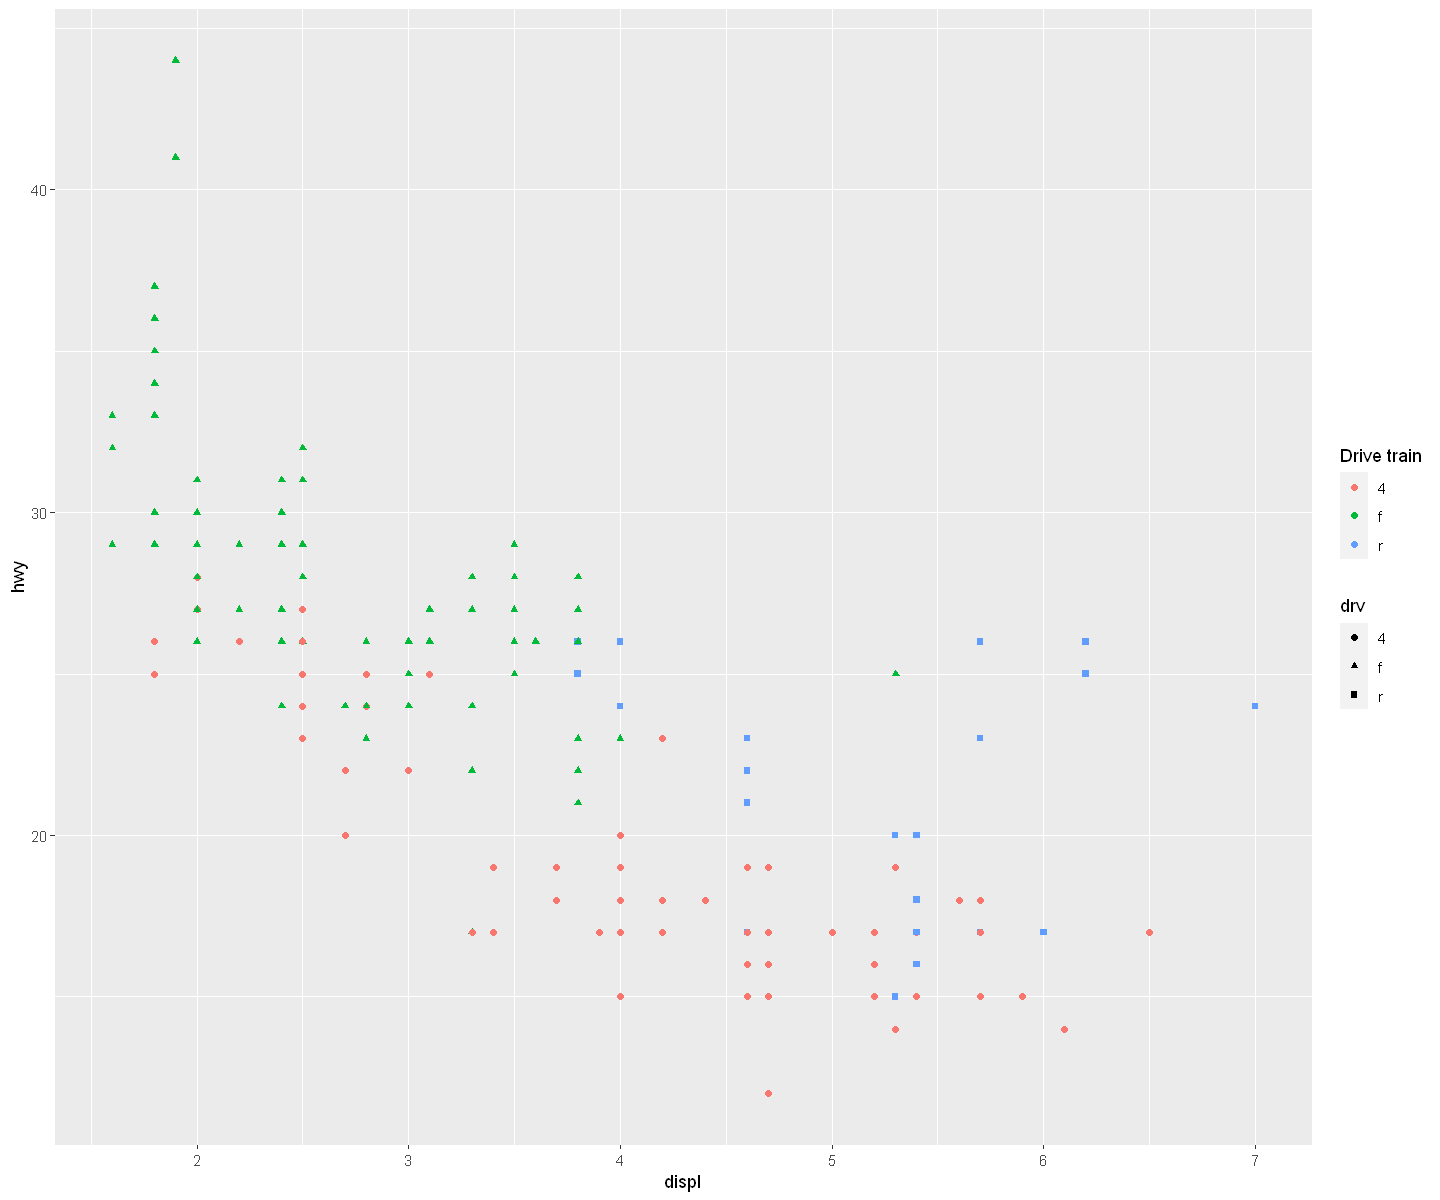

In [9]:
options(repr.plot.width=12, repr.plot.height=10)

ggplot(mpg, 
       aes(displ, hwy)) + 
geom_point(aes(colour = drv, shape = drv)) + 
scale_colour_discrete("Drive train")

The plot has two legends for the same values. The legends can be just one with the same name. We need make sure that legends are merged using same name. We need to keep the same name for colour and shapes




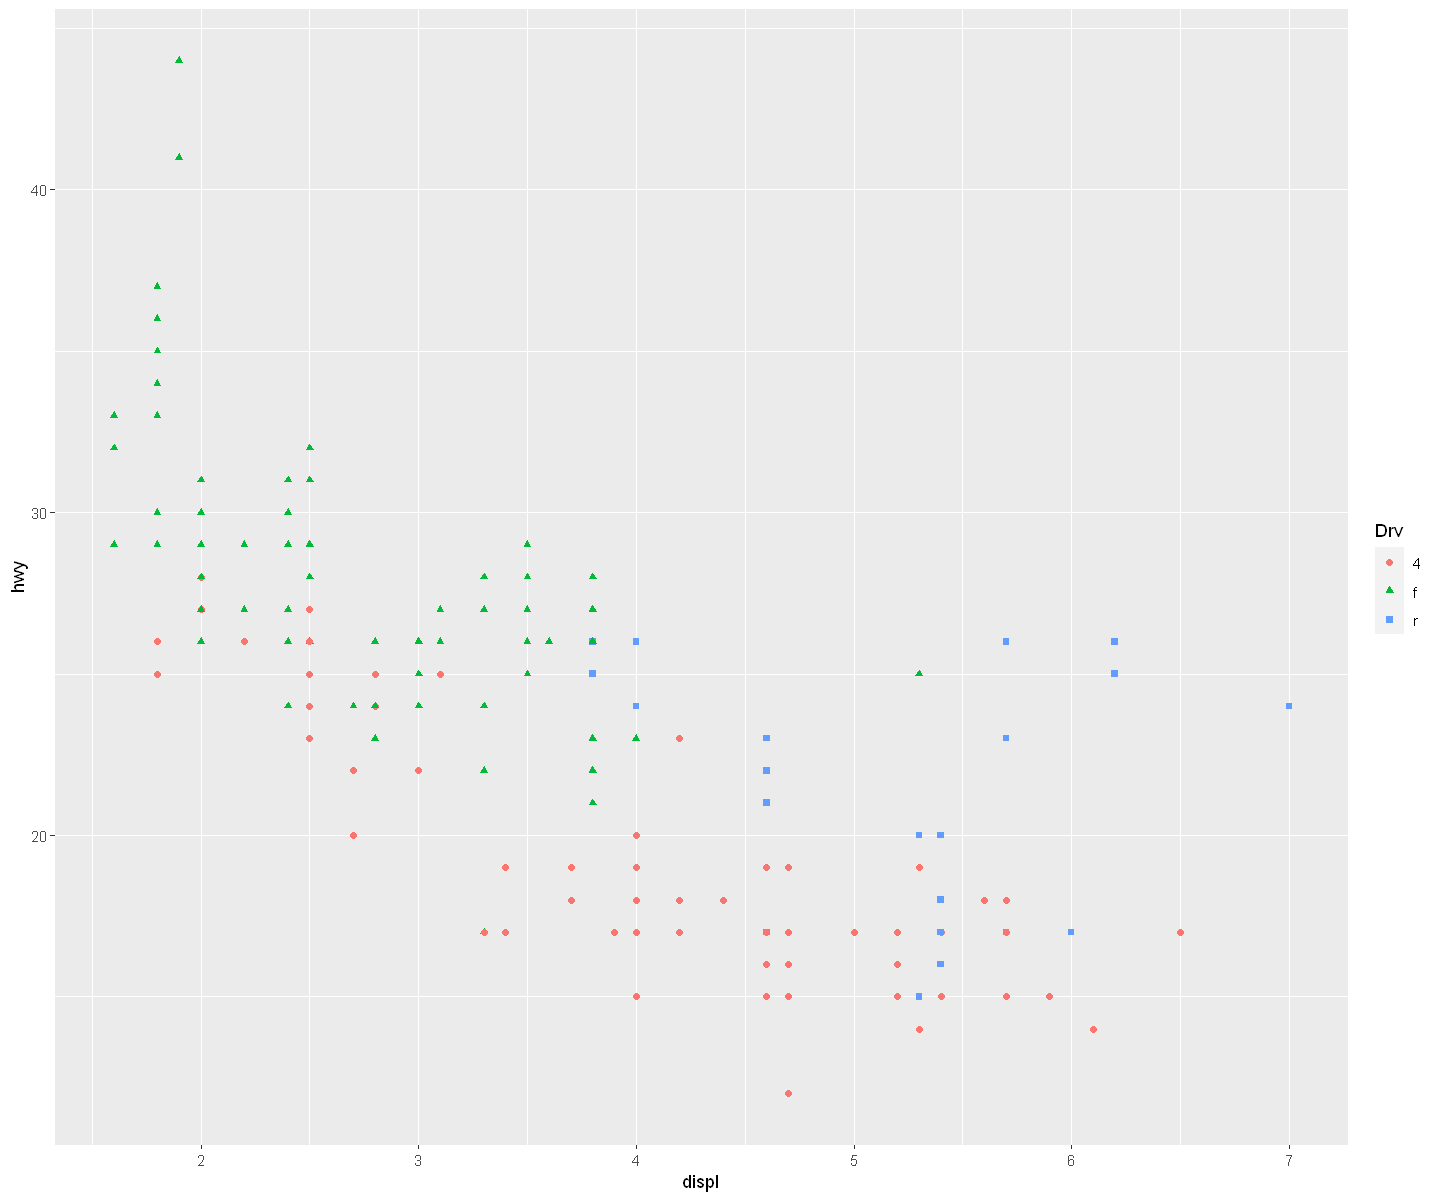

In [10]:
ggplot(mpg, 
       aes(displ, hwy)) +
geom_point(aes(color = drv, shape = drv)) +
labs(color = "Drv", 
     shape = "Drv")

4. Diamonds: 
    1. Display the distribution of price conditional on cut and carat. 
    2. Try facetting by cut and grouping by carat.
    3. Try facetting by carat and grouping by cut.
    4. Which do you prefer?

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



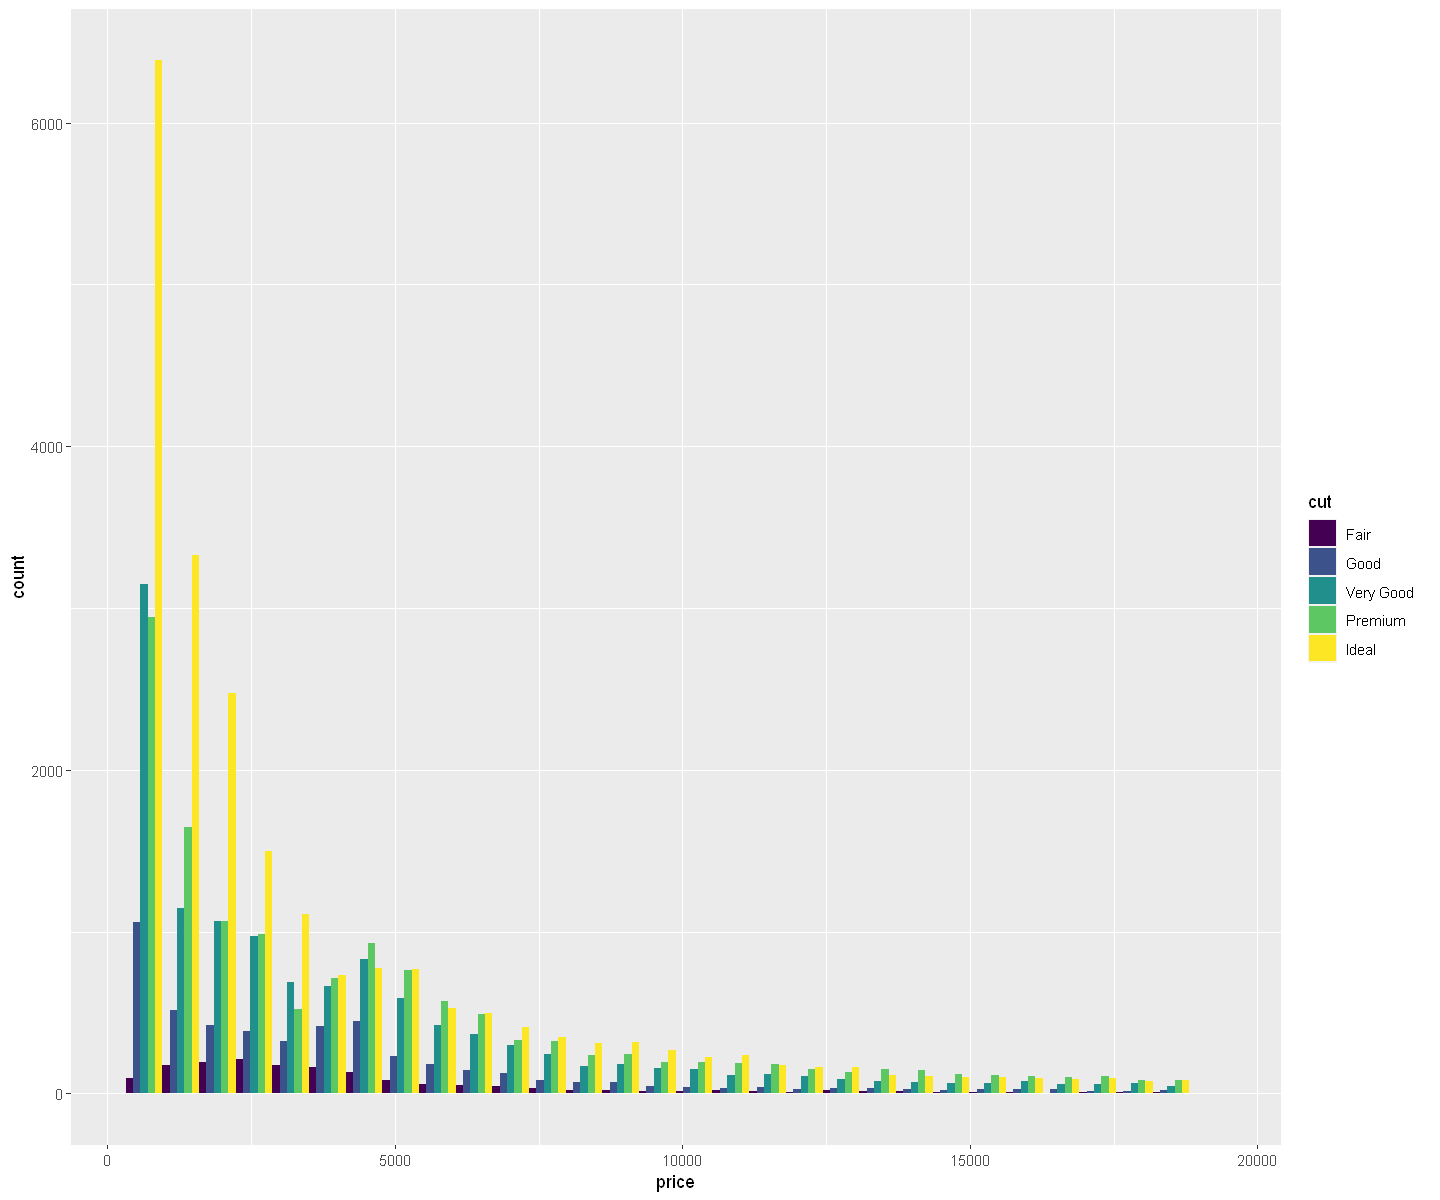

In [27]:
# Your solution
#Start with:
cut_plot <- ggplot(diamonds)

cut_plot+
geom_histogram(aes(x = price, fill = cut) , position = "dodge")



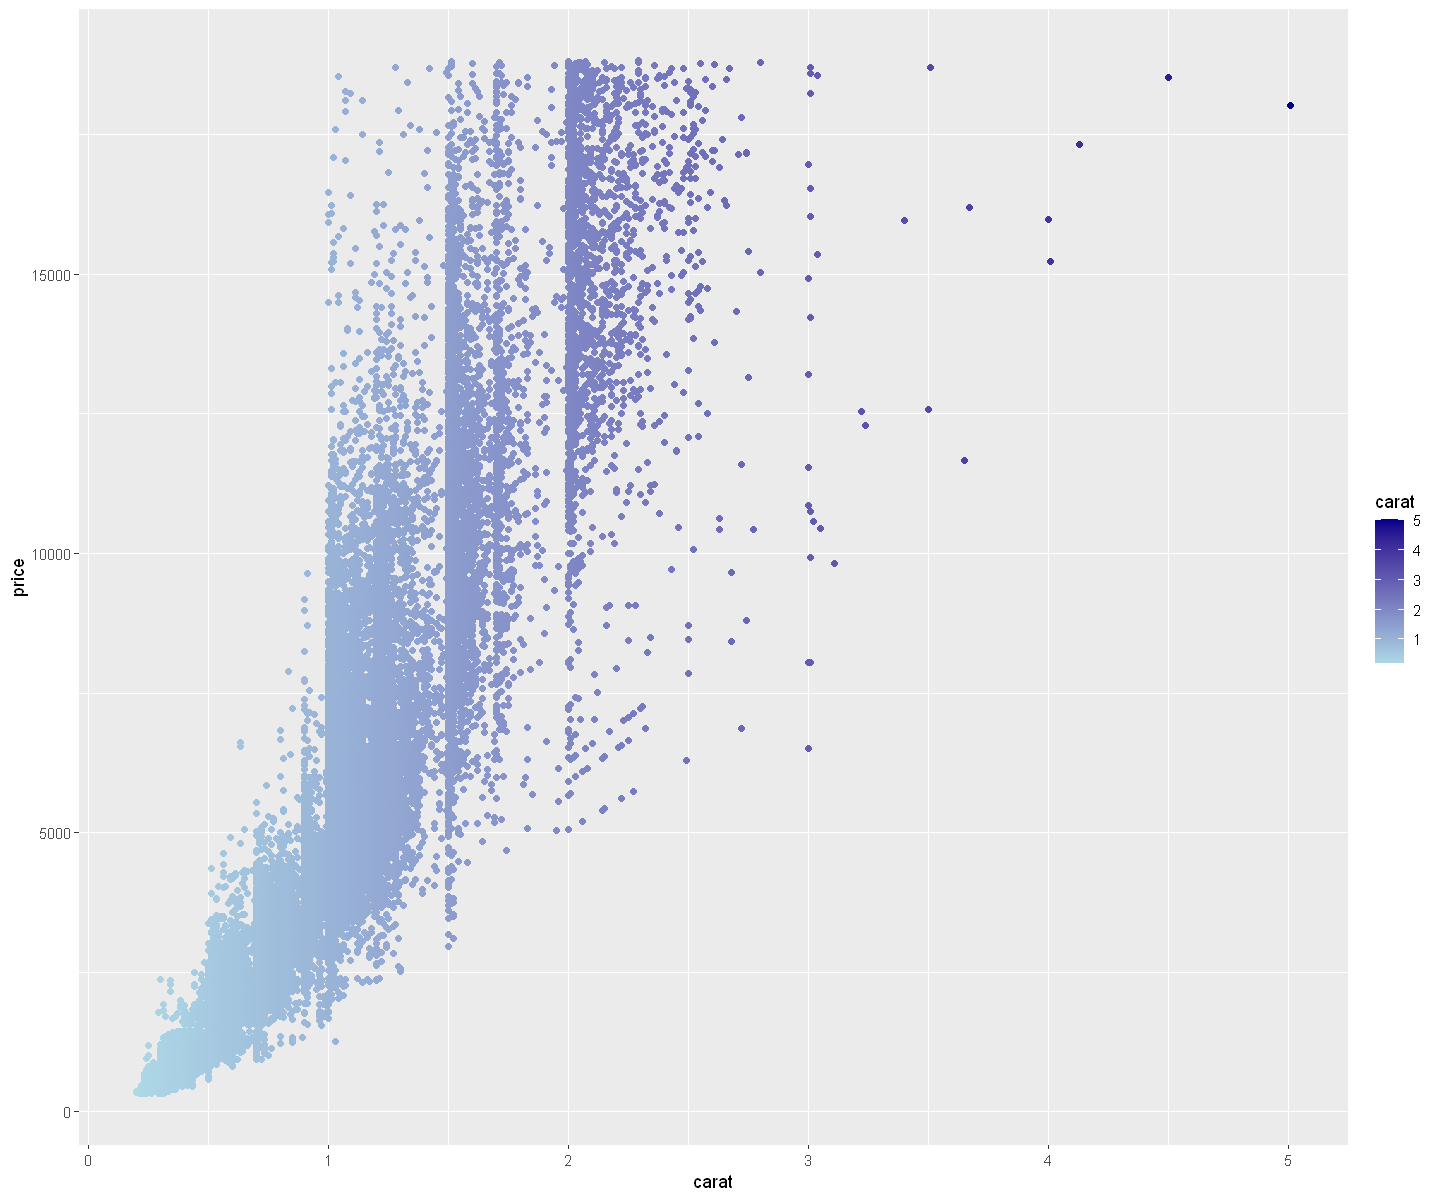

In [36]:
# 1
carat_plot <- ggplot(diamonds, 
                     aes(carat, price))
new_carat<-carat_plot + 
geom_point(aes(color = carat))+scale_colour_gradient(low = "light blue", high="dark blue")

new_carat

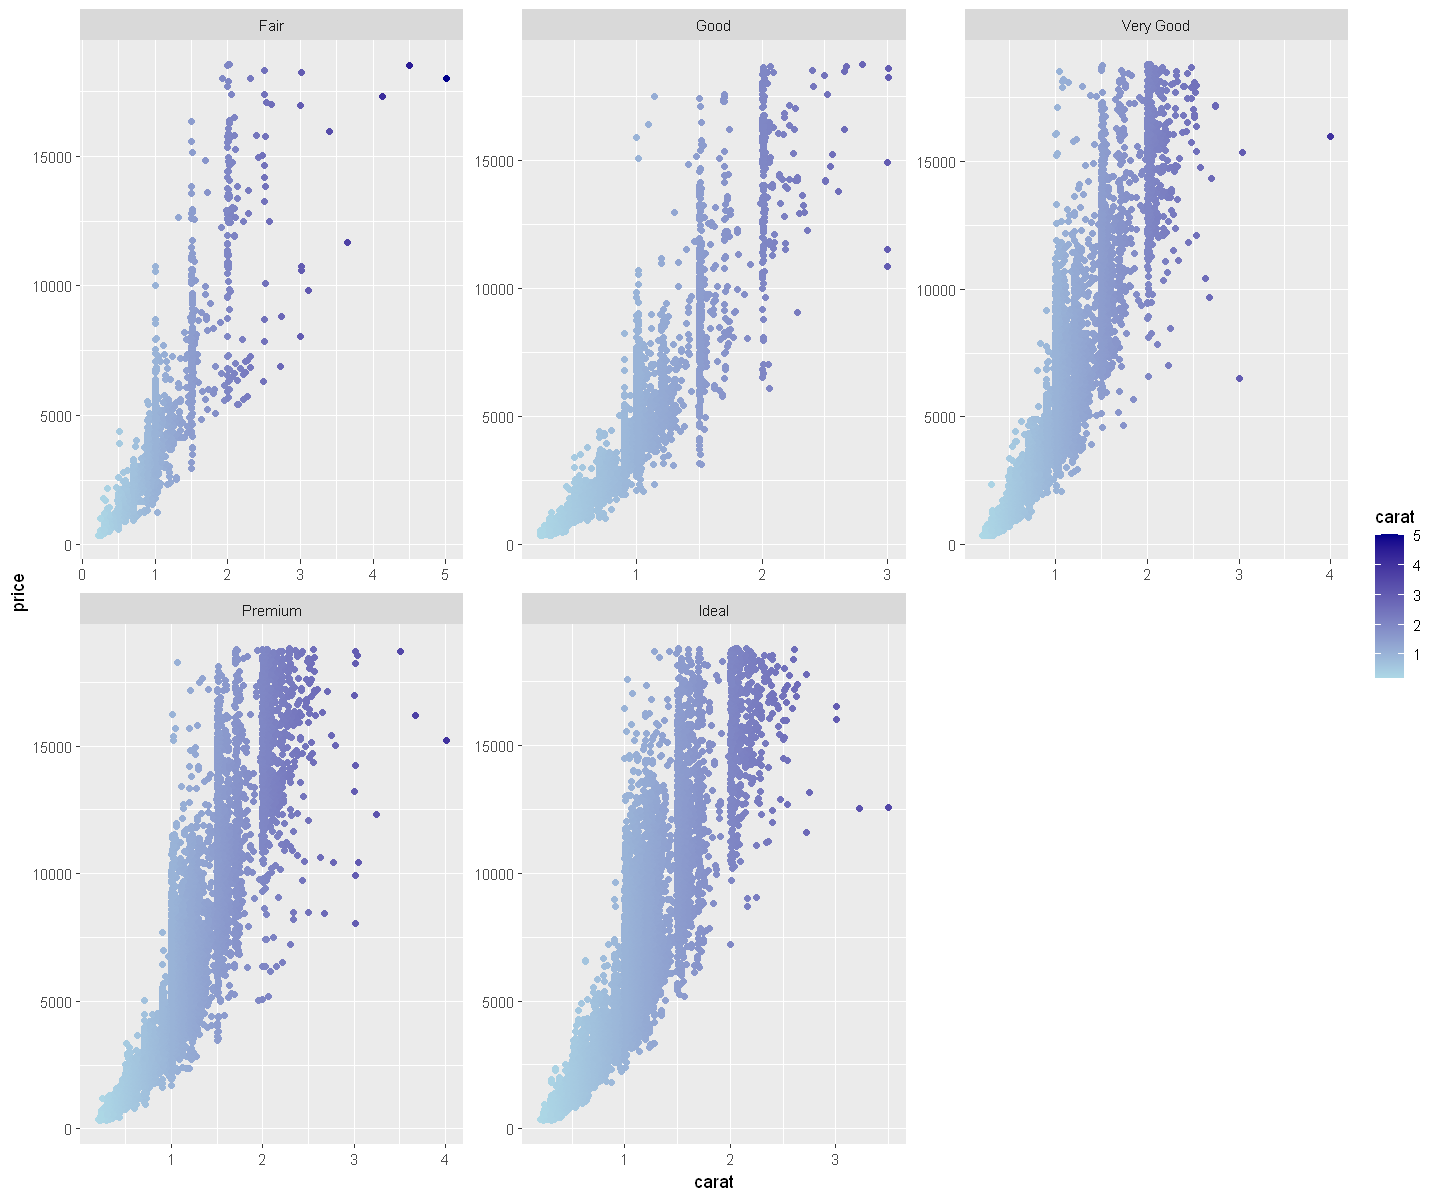

In [37]:
new_carat+
facet_wrap(~ cut, 
           scales = "free")

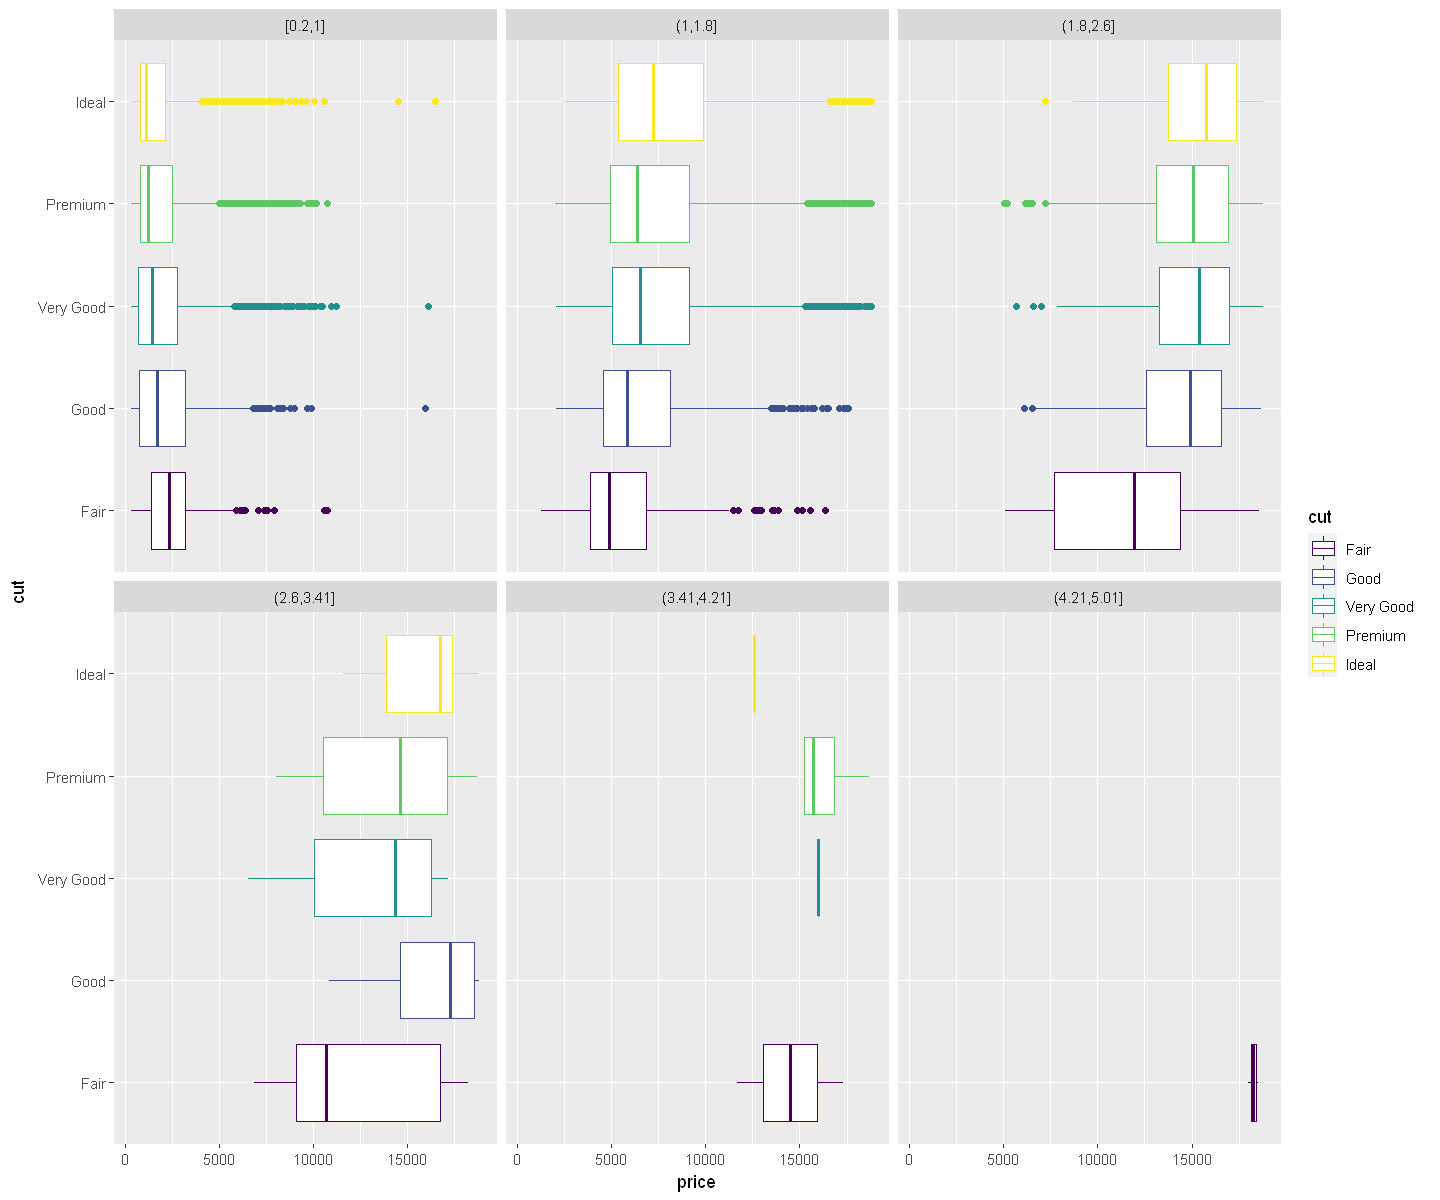

In [57]:
d2 <- diamonds
d2$carats <- cut_interval(diamonds$carat, 6)

ggplot(diamonds, 
       aes(cut, price)) +
geom_boxplot(aes(color = cut)) +
coord_flip() +
facet_wrap(~ d2$carats)

The second plot gives a better idea about the distribution of price according to cuts &carats. The box plot allows to see distribution of prices according for each cut for a range of carat. 